In [1]:
from PIL import Image
import matplotlib.pyplot as pl
from PCV.localdescriptors import harris
from pylab import *
from numpy import *

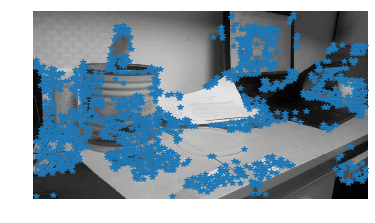

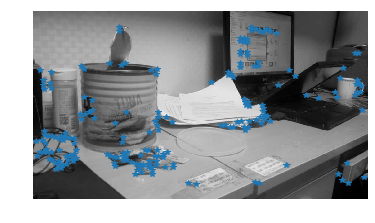

In [2]:
"""
Example of detecting Harris corner points (Figure 2-1 in the book).
"""
# open image
im = array(Image.open('./data/cane_1.jpeg').convert('L'))

# detect corners and plot
harrisim = harris.compute_harris_response(im)
filtered_coords = harris.get_harris_points(harrisim, 10, threshold=0.01)
harris.plot_harris_points(im, filtered_coords)

# plot only 200 strongest
harris.plot_harris_points(im, filtered_coords[:200])

In [22]:
from PCV.tools.imtools import imresize
im1 = array(Image.open("./data/cane_1.jpeg").convert("L"))
im2 = array(Image.open("./data/cane_2.jpeg").convert("L"))
print(im1.shape)
print(im2.shape[1]/2,im2.shape[0]/2)

# resize to make matching faster
im1 = imresize(im1,(int(im1.shape[1]/2),int(im1.shape[0]/2)))
im2 = imresize(im2,(int(im2.shape[1]/2),int(im2.shape[0]/2)))

(607, 1080)
540.0 303.5


starting matching


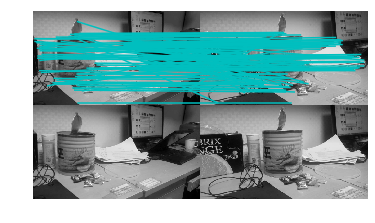

In [23]:
wid = 5
harrisim = harris.compute_harris_response(im1,5) 
filtered_coords1 = harris.get_harris_points(harrisim,wid+1) 
d1 = harris.get_descriptors(im1,filtered_coords1,wid)

harrisim = harris.compute_harris_response(im2,5) 
filtered_coords2 = harris.get_harris_points(harrisim,wid+1) 
d2 = harris.get_descriptors(im2,filtered_coords2,wid)

print('starting matching')
matches = harris.match_twosided(d1,d2)

figure()
gray() 
harris.plot_matches(im1,im2,filtered_coords1,filtered_coords2,matches) 
show()